# Change Filename Extension

In [1]:
# import pandas as pd
# import os

# FILE_PATH = 'datasets/'

# folders = os.listdir(FILE_PATH) 

# for folder in folders:
#     for filename in os.listdir(FILE_PATH + '/' + folder):
# #         print(os.path.join(FILE_PATH + '/' + folder,filename))
#         os.rename(os.path.join(FILE_PATH + '/' + folder,filename), os.path.join(FILE_PATH + '/' + folder,filename) + '.txt')

# Data Preprocessing - Convert txt file into image file

In [2]:
# DiePitch 300000 300000;
import os
import matplotlib.pyplot as plt 
IMAGE_FILE_PATH = 'silicon_img'

def save_img(silicon_pd, filename):
    ax = plt.gca()
    ax.cla() # clear things for fresh plot

    ax.set_xlim((0, 300000))
    ax.set_ylim((0, 300000))
    ax.set_aspect('equal')

#     ax.scatter(silicon_pd['XREL'],silicon_pd['YREL'], s=abs(silicon_pd['DSIZE']*100))
    ax.scatter(silicon_pd['XREL'],silicon_pd['YREL'])

    radius = 300000/2
    center = (300000/2, 300000/2)
    circle = plt.Circle(center, radius, color='blue', fill=False)
    ax.add_artist(circle)
    plt.axis('off')
    plt.savefig(IMAGE_FILE_PATH + '/' + filename + ".png", bbox_inches='tight')
#     plt.show()

In [5]:
import pandas as pd
from IPython.display import display

RAW_DATA_PATH = 'datasets/'

folders = os.listdir(RAW_DATA_PATH) 
column_number = 0

for folder in folders:
    for filename in os.listdir(RAW_DATA_PATH + '/' + folder):
        print(filename)
        silicon_file_path = os.path.join(RAW_DATA_PATH + '/' + folder,filename)
        silicon_pd = pd.read_csv(silicon_file_path, header=None)
        # ng_01_pd = pd.read_csv(FILE_PATH + '/NG0003.001.txt', header=None)
        
        if not silicon_pd[silicon_pd[0].str.contains('DefectRecordSpec')].empty:
#             print(type(silicon_pd[silicon_pd[0].str.contains('DefectRecordSpec')]))
#             print(silicon_pd[silicon_pd[0].str.contains('DefectRecordSpec')])

            columns_def = silicon_pd[silicon_pd[0].str.contains('DefectRecordSpec')].to_string()
            index = columns_def.split(' ').index('DefectRecordSpec') + 1
            column_number = int(columns_def.split(' ')[index])
#             print('column_number', column_number)
        
        if not silicon_pd[silicon_pd[0].str.contains('DefectList;')].empty:
            print('Good Sample', filename)
            continue
        start = silicon_pd[silicon_pd[0] == 'DefectList'].index[0]
        middle = silicon_pd[silicon_pd[0] == 'ProcessEquipmentIDList 1'].index[0]
        end = max(silicon_pd.index)
        print(start, middle, end)
        skiprows = set.union(set(range(start+1)), set(range(middle, end+1)))
        silicon_pd = pd.read_csv(silicon_file_path, skiprows=skiprows, delim_whitespace=True, header=None)
        columns_names = [
            'DEFECTID',
            'XREL',
            'YREL',
            'XINDEX',
            'YINDEX',
            'XSIZE',
            'YSIZE',
            'DEFECTAREA',
            'DSIZE',
            'CLASSNUMBER',
            'TEST', # 模式一只取 TEST = 1 or TEST = 6
            'CLUSTERNUMBER',
            'ROUGHBINNUMBER',
            'FINEBINNUMBER',
            'REVIEWSAMPLE',
            'IMAGECOUNT',
            'IMAGELIST'
        ]
        silicon_pd.columns = columns_names[:column_number]
#       display(silicon_pd[silicon_pd['TEST'].isin([1, 6])])
        silicon_pd_mode1 = silicon_pd[silicon_pd['TEST'].isin([1, 6])]
        save_img(silicon_pd_mode1, filename)

OK0001.001.txt
34 67 76
OK0002.001.txt
35 100 109
OK0003.001.txt
32 50 59
OK0004.001.txt
34 148 157
OK0005.001.txt
34 78 87
OK0006.001.txt
32 214 223
OK0007.001.txt
32 59 68
OK0008.001.txt
32 66 75
OK0009.001.txt
34 64 73
OK0010.001.txt
32 81 90
OK0011.001.txt
34 85 94
OK0012.001.txt
34 71 80
OK0013.001.txt
34 65 74
OK0014.001.txt
32 59 68
OK0015.001.txt
34 66 75
OK0016.001.txt
35 78 87
OK0017.001.txt
34 70 79
OK0018.001.txt
35 141 150
OK0019.001.txt
34 74 83
OK0020.001.txt
34 139 148
OK0021.001.txt
34 62 71
OK0022.001.txt
32 60 69
OK0023.001.txt
32 86 95
OK0024.001.txt
32 71 80
OK0025.001.txt
34 70 79
OK0026.001.txt
34 80 89
OK0027.001.txt
32 57 66
OK0028.001.txt
32 86 95
OK0029.001.txt
32 55 64
OK0030.001.txt
38 81 90
OK0031.001.txt
36 57 66
OK0032.001.txt
36 73 82
OK0033.001.txt
37 72 81
OK0034.001.txt
36 67 76
OK0035.001.txt
36 91 100
OK0036.001.txt
36 65 74
OK0037.001.txt
36 66 75
OK0038.001.txt
36 76 85
OK0039.001.txt
36 71 80
OK0040.001.txt
36 91 100
OK0041.001.txt
38 112 121
OK

OK0340.001.txt
32 76 85
OK0341.001.txt
34 104 113
OK0342.001.txt
34 86 95
OK0343.001.txt
35 122 131
OK0344.001.txt
34 111 120
OK0345.001.txt
34 84 93
OK0346.001.txt
32 78 87
OK0347.001.txt
32 69 78
OK0348.001.txt
35 106 115
OK0349.001.txt
34 509 518
OK0350.001.txt
34 92 101
OK0351.001.txt
34 82 91
OK0352.001.txt
34 82 91
OK0353.001.txt
32 64 73
OK0354.001.txt
34 65 74
OK0355.001.txt
35 91 100
OK0356.001.txt
35 89 98
OK0357.001.txt
36 109 118
OK0358.001.txt
34 65 74
OK0359.001.txt
32 52 61
OK0360.001.txt
34 70 79
OK0361.001.txt
34 72 81
OK0362.001.txt
32 75 84
OK0363.001.txt
34 90 99
OK0364.001.txt
32 72 81
OK0365.001.txt
35 151 160
OK0366.001.txt
32 80 89
OK0367.001.txt
32 83 92
OK0368.001.txt
32 74 83
OK0369.001.txt
32 60 69
OK0370.001.txt
34 55 64
OK0371.001.txt
32 61 70
OK0372.001.txt
34 67 76
OK0373.001.txt
36 133 142
OK0374.001.txt
34 104 113
OK0375.001.txt
34 69 78
OK0376.001.txt
35 73 82
OK0377.001.txt
34 72 81
OK0378.001.txt
34 70 79
OK0379.001.txt
34 83 92
OK0380.001.txt
32 66

OK0678.001.txt
28 54 62
OK0679.001.txt
32 62 71
OK0680.001.txt
36 69 78
OK0681.001.txt
28 38 46
OK0682.001.txt
36 74 83
OK0683.001.txt
36 61 70
OK0684.001.txt
36 79 88
OK0685.001.txt
28 35 43
OK0686.001.txt
36 59 68
OK0687.001.txt
36 95 104
OK0688.001.txt
Good Sample OK0688.001.txt
OK0689.001.txt
36 90 99
OK0690.001.txt
28 86 94
OK0691.001.txt
36 61 70
OK0692.001.txt
37 95 104
OK0693.001.txt
39 131 140
OK0694.001.txt
36 84 93
OK0695.001.txt
36 79 88
OK0696.001.txt
33 42 51
OK0697.001.txt
Good Sample OK0697.001.txt
OK0698.001.txt
36 70 79
OK0699.001.txt
28 31 39
OK0700.001.txt
30 67 75
OK0701.001.txt
36 98 107
OK0702.001.txt
33 40 49
OK0703.001.txt
36 67 76
OK0704.001.txt
38 88 97
OK0705.001.txt
36 65 74
OK0706.001.txt
36 59 68
OK0707.001.txt
36 93 102
OK0708.001.txt
36 55 64
OK0709.001.txt
36 67 76
OK0710.001.txt
36 72 81
OK0711.001.txt
36 66 75
OK0712.001.txt
36 64 73
OK0713.001.txt
36 51 60
OK0714.001.txt
36 58 67
OK0715.001.txt
36 89 98
OK0716.001.txt
36 65 74
OK0717.001.txt
36 54 6

OK1012.001.txt
34 92 101
OK1013.001.txt
32 63 72
OK1014.001.txt
34 65 74
OK1015.001.txt
34 73 82
OK1016.001.txt
32 53 62
OK1017.001.txt
32 54 63
OK1018.001.txt
34 76 85
OK1019.001.txt
34 89 98
OK1020.001.txt
34 244 253
OK1021.001.txt
34 67 76
OK1022.001.txt
32 50 59
OK1023.001.txt
32 59 68
OK1024.001.txt
35 86 95
OK1025.001.txt
34 78 87
OK1026.001.txt
28 32 40
OK1027.001.txt
32 65 74
OK1028.001.txt
34 62 71
OK1029.001.txt
32 56 65
OK1030.001.txt
32 47 56
OK1031.001.txt
32 54 63
OK1032.001.txt
34 85 94
OK1033.001.txt
Good Sample OK1033.001.txt
OK1034.001.txt
32 60 69
OK1035.001.txt
35 87 96
OK1036.001.txt
34 70 79
OK1037.001.txt
Good Sample OK1037.001.txt
OK1038.001.txt
34 61 70
OK1039.001.txt
28 32 40
OK1040.001.txt
34 76 85
OK1041.001.txt
32 55 64
OK1042.001.txt
34 108 117
OK1043.001.txt
32 52 61
OK1044.001.txt
32 63 72
OK1045.001.txt
28 47 55
OK1046.001.txt
32 56 65
OK1047.001.txt
32 50 59
OK1048.001.txt
34 66 75
OK1049.001.txt
34 71 80
OK1050.001.txt
32 46 55
OK1051.001.txt
32 51 60

OK1342.001.txt
Good Sample OK1342.001.txt
OK1343.001.txt
28 38 46
OK1344.001.txt
36 73 82
OK1345.001.txt
36 66 75
OK1346.001.txt
36 68 77
OK1347.001.txt
33 43 52
OK1348.001.txt
33 37 46
OK1349.001.txt
33 44 53
OK1350.001.txt
28 32 40
OK1351.001.txt
32 40 49
OK1352.001.txt
33 37 46
OK1353.001.txt
36 63 72
OK1354.001.txt
36 63 72
OK1355.001.txt
36 71 80
OK1356.001.txt
36 73 82
OK1357.001.txt
38 101 110
OK1358.001.txt
36 67 76
OK1359.001.txt
36 72 81
OK1360.001.txt
37 71 80
OK1361.001.txt
36 63 72
OK1362.001.txt
33 39 48
OK1363.001.txt
36 67 76
OK1364.001.txt
33 50 59
OK1365.001.txt
36 63 72
OK1366.001.txt
36 71 80
OK1367.001.txt
36 57 66
OK1368.001.txt
36 78 87
OK1369.001.txt
36 71 80
OK1370.001.txt
36 65 74
OK1371.001.txt
36 61 70
OK1372.001.txt
33 37 46
OK1373.001.txt
33 37 46
OK1374.001.txt
33 36 45
OK1375.001.txt
36 101 110
OK1376.001.txt
36 66 75
OK1377.001.txt
36 86 95
OK1378.001.txt
36 59 68
OK1379.001.txt
36 60 69
OK1380.001.txt
33 36 45
OK1381.001.txt
33 39 48
OK1382.001.txt
33 

OK1678.001.txt
36 67 76
OK1679.001.txt
36 80 89
OK1680.001.txt
36 64 73
OK1681.001.txt
28 32 40
OK1682.001.txt
36 65 74
OK1683.001.txt
36 67 76
OK1684.001.txt
36 79 88
OK1685.001.txt
36 68 77
OK1686.001.txt
37 87 96
OK1687.001.txt
36 71 80
OK1688.001.txt
36 66 75
OK1689.001.txt
35 140 149
OK1690.001.txt
28 32 40
OK1691.001.txt
32 68 77
OK1692.001.txt
35 88 97
OK1693.001.txt
32 60 69
OK1694.001.txt
32 62 71
OK1695.001.txt
34 69 78
OK1696.001.txt
34 89 98
OK1697.001.txt
32 78 87
OK1698.001.txt
34 84 93
OK1699.001.txt
34 85 94
OK1700.001.txt
34 51 60
OK1701.001.txt
32 54 63
OK1702.001.txt
Good Sample OK1702.001.txt
OK1703.001.txt
34 89 98
OK1704.001.txt
32 64 73
OK1705.001.txt
34 60 69
OK1706.001.txt
34 64 73
OK1707.001.txt
28 32 40
OK1708.001.txt
32 42 51
OK1709.001.txt
32 52 61
OK1710.001.txt
28 32 40
OK1711.001.txt
36 63 72
OK1712.001.txt
36 72 81
OK1713.001.txt
36 76 85
OK1714.001.txt
28 32 40
OK1715.001.txt
36 64 73
OK1716.001.txt
36 70 79
OK1717.001.txt
38 90 99
OK1718.001.txt
36 67

OK2013.001.txt
34 67 76
OK2014.001.txt
34 72 81
OK2015.001.txt
36 82 91
OK2016.001.txt
35 68 77
OK2017.001.txt
37 62 71
OK2018.001.txt
36 60 69
OK2019.001.txt
36 62 71
OK2020.001.txt
Good Sample OK2020.001.txt
OK2021.001.txt
Good Sample OK2021.001.txt
OK2022.001.txt
33 60 69
OK2023.001.txt
33 62 71
OK2024.001.txt
33 80 89
OK2025.001.txt
33 79 88
OK2026.001.txt
33 84 93
OK2027.001.txt
36 80 89
OK2028.001.txt
36 76 85
OK2029.001.txt
36 63 72
OK2030.001.txt
36 61 70
OK2031.001.txt
38 82 91
OK2032.001.txt
36 58 67
OK2033.001.txt
36 58 67
OK2034.001.txt
36 64 73
OK2035.001.txt
36 65 74
OK2036.001.txt
36 64 73
OK2037.001.txt
36 61 70
OK2038.001.txt
36 67 76
OK2039.001.txt
36 62 71
OK2040.001.txt
36 78 87
OK2041.001.txt
36 68 77
OK2042.001.txt
28 32 40
OK2043.001.txt
36 59 68
OK2044.001.txt
36 79 88
OK2045.001.txt
36 79 88
OK2046.001.txt
28 34 42
OK2047.001.txt
36 72 81
OK2048.001.txt
Good Sample OK2048.001.txt
OK2049.001.txt
32 58 67
OK2050.001.txt
32 53 62
OK2051.001.txt
32 57 66
OK2052.001

OK2346.001.txt
36 98 107
OK2347.001.txt
36 59 68
OK2348.001.txt
36 57 66
OK2349.001.txt
36 58 67
OK2350.001.txt
36 58 67
OK2351.001.txt
36 75 84
OK2352.001.txt
38 104 113
OK2353.001.txt
36 63 72
OK2354.001.txt
28 32 40
OK2355.001.txt
36 68 77
OK2356.001.txt
36 63 72
OK2357.001.txt
36 62 71
OK2358.001.txt
36 60 69
OK2359.001.txt
36 70 79
OK2360.001.txt
36 82 91
OK2361.001.txt
36 74 83
OK2362.001.txt
36 56 65
OK2363.001.txt
37 82 91
OK2364.001.txt
36 63 72
OK2365.001.txt
36 65 74
OK2366.001.txt
36 65 74
OK2367.001.txt
36 83 92
OK2368.001.txt
36 69 78
OK2369.001.txt
37 70 79
OK2370.001.txt
36 63 72
OK2371.001.txt
28 35 43
OK2372.001.txt
33 47 56
OK2373.001.txt
36 74 83
OK2374.001.txt
36 58 67
OK2375.001.txt
36 62 71
OK2376.001.txt
36 65 74
OK2377.001.txt
36 72 81
OK2378.001.txt
36 57 66
OK2379.001.txt
36 68 77
OK2380.001.txt
36 64 73
OK2381.001.txt
36 57 66
OK2382.001.txt
36 59 68
OK2383.001.txt
36 78 87
OK2384.001.txt
36 65 74
OK2385.001.txt
36 63 72
OK2386.001.txt
36 65 74
OK2387.001.tx

OK2679.001.txt
36 63 72
OK2680.001.txt
30 135 143
OK2681.001.txt
33 57 66
OK2682.001.txt
36 82 91
OK2683.001.txt
28 42 50
OK2684.001.txt
36 81 90
OK2685.001.txt
33 61 70
OK2686.001.txt
28 47 55
OK2687.001.txt
36 79 88
OK2688.001.txt
35 62 71
OK2689.001.txt
33 55 64
OK2690.001.txt
36 66 75
OK2691.001.txt
28 32 40
OK2692.001.txt
36 84 93
OK2693.001.txt
36 72 81
OK2694.001.txt
36 70 79
OK2695.001.txt
36 73 82
OK2696.001.txt
28 34 42
OK2697.001.txt
36 71 80
OK2698.001.txt
30 96 104
OK2699.001.txt
30 83 91
OK2700.001.txt
36 80 89
OK2701.001.txt
36 61 70
OK2702.001.txt
28 32 40
OK2703.001.txt
36 65 74
OK2704.001.txt
36 76 85
OK2705.001.txt
36 78 87
OK2706.001.txt
36 75 84
OK2707.001.txt
36 70 79
OK2708.001.txt
36 75 84
OK2709.001.txt
36 71 80
OK2710.001.txt
36 73 82
OK2711.001.txt
36 79 88
OK2712.001.txt
36 73 82
OK2713.001.txt
36 72 81
OK2714.001.txt
36 67 76
OK2715.001.txt
36 80 89
OK2716.001.txt
36 72 81
OK2717.001.txt
35 153 162
OK2718.001.txt
36 71 80
OK2719.001.txt
36 78 87
OK2720.001.

OK3019.001.txt
34 67 76
OK3020.001.txt
32 52 61
OK3021.001.txt
34 88 97
OK3022.001.txt
32 59 68
OK3023.001.txt
34 63 72
OK3024.001.txt
32 67 76
OK3025.001.txt
34 67 76
OK3026.001.txt
34 59 68
OK3027.001.txt
34 76 85
OK3028.001.txt
34 66 75
OK3029.001.txt
32 60 69
OK3030.001.txt
34 66 75
OK3031.001.txt
34 63 72
OK3032.001.txt
34 68 77
OK3033.001.txt
34 67 76
OK3034.001.txt
34 76 85
OK3035.001.txt
34 63 72
OK3036.001.txt
34 63 72
OK3037.001.txt
34 56 65
OK3038.001.txt
34 68 77
OK3039.001.txt
34 61 70
OK3040.001.txt
34 59 68
OK3041.001.txt
34 61 70
OK3042.001.txt
32 51 60
OK3043.001.txt
34 64 73
OK3044.001.txt
34 55 64
OK3045.001.txt
32 52 61
OK3046.001.txt
34 62 71
OK3047.001.txt
34 72 81
OK3048.001.txt
34 94 103
OK3049.001.txt
34 67 76
OK3050.001.txt
34 58 67
OK3051.001.txt
32 70 79
OK3052.001.txt
28 33 41
OK3053.001.txt
32 73 82
OK3054.001.txt
34 71 80
OK3055.001.txt
34 76 85
OK3056.001.txt
34 71 80
OK3057.001.txt
32 49 58
OK3058.001.txt
32 66 75
OK3059.001.txt
34 52 61
OK3060.001.txt


OK3359.001.txt
32 66 75
OK3360.001.txt
32 51 60
OK3361.001.txt
32 74 83
OK3362.001.txt
32 58 67
OK3363.001.txt
32 56 65
OK3364.001.txt
32 45 54
OK3365.001.txt
32 83 92
OK3366.001.txt
32 53 62
OK3367.001.txt
32 58 67
OK3368.001.txt
36 99 109
OK3369.001.txt
32 54 63
OK3370.001.txt
32 52 61
OK3371.001.txt
36 61 71
OK3372.001.txt
32 65 74
OK3373.001.txt
32 102 111
OK3374.001.txt
32 67 76
OK3375.001.txt
32 55 64
OK3376.001.txt
36 77 87
OK3377.001.txt
32 112 121
OK3378.001.txt
32 57 66
OK3379.001.txt
32 47 56
OK3380.001.txt
32 63 72
OK3381.001.txt
32 58 67
OK3382.001.txt
32 58 67
OK3383.001.txt
32 80 89
OK3384.001.txt
32 61 70
OK3385.001.txt
32 52 61
OK3386.001.txt
32 72 81
OK3387.001.txt
32 64 73
OK3388.001.txt
32 56 65
OK3389.001.txt
32 46 55
OK3390.001.txt
32 75 84
OK3391.001.txt
32 76 85
OK3392.001.txt
32 59 68
OK3393.001.txt
32 61 70
OK3394.001.txt
32 45 54
OK3395.001.txt
32 51 60
OK3396.001.txt
32 69 78
OK3397.001.txt
32 54 63
OK3398.001.txt
32 58 67
OK3399.001.txt
32 58 67
OK3400.001.

OK3699.001.txt
32 49 58
OK3700.001.txt
32 63 72
OK3701.001.txt
32 59 68
OK3702.001.txt
36 50 60
OK3703.001.txt
36 95 105
OK3704.001.txt
32 53 62
OK3705.001.txt
32 62 71
OK3706.001.txt
32 69 78
OK3707.001.txt
32 63 72
OK3708.001.txt
32 136 145
OK3709.001.txt
36 77 87
OK3710.001.txt
32 73 82
OK3711.001.txt
32 52 61
OK3712.001.txt
32 94 103
OK3713.001.txt
32 73 82
OK3714.001.txt
32 54 63
OK3715.001.txt
32 111 120
OK3716.001.txt
32 52 61
OK3717.001.txt
32 72 81
OK3718.001.txt
32 64 73
OK3719.001.txt
32 57 66
OK3720.001.txt
32 67 76
OK3721.001.txt
36 95 105
OK3722.001.txt
34 71 80
OK3723.001.txt
34 112 121
OK3724.001.txt
34 63 72
OK3725.001.txt
34 80 89
OK3726.001.txt
34 49 58
OK3727.001.txt
34 55 64
OK3728.001.txt
32 52 61
OK3729.001.txt
34 63 72
OK3730.001.txt
34 63 72
OK3731.001.txt
34 65 74
OK3732.001.txt
34 63 72
OK3733.001.txt
34 77 86
OK3734.001.txt
34 63 72
OK3735.001.txt
34 53 62
OK3736.001.txt
34 76 85
OK3737.001.txt
32 106 115
OK3738.001.txt
34 75 84
OK3739.001.txt
34 74 83
OK374

OK4039.001.txt
32 56 65
OK4040.001.txt
32 62 71
OK4041.001.txt
32 73 82
OK4042.001.txt
34 113 122
OK4043.001.txt
32 73 82
OK4044.001.txt
32 67 76
OK4045.001.txt
32 64 73
OK4046.001.txt
32 59 68
OK4047.001.txt
34 61 70
OK4048.001.txt
34 55 64
OK4049.001.txt
32 90 99
OK4050.001.txt
32 73 82
OK4051.001.txt
32 71 80
OK4052.001.txt
32 77 86
OK4053.001.txt
32 96 105
OK4054.001.txt
34 97 106
OK4055.001.txt
32 72 81
OK4056.001.txt
32 74 83
OK4057.001.txt
34 91 100
OK4058.001.txt
32 86 95
OK4059.001.txt
32 60 69
OK4060.001.txt
32 80 89
OK4061.001.txt
32 103 112
OK4062.001.txt
32 66 75
OK4063.001.txt
32 87 96
OK4064.001.txt
32 84 93
OK4065.001.txt
32 97 106
OK4066.001.txt
32 67 76
OK4067.001.txt
32 60 69
OK4068.001.txt
34 89 98
OK4069.001.txt
34 66 75
OK4070.001.txt
34 64 73
OK4071.001.txt
34 66 75
OK4072.001.txt
34 68 77
OK4073.001.txt
34 55 64
OK4074.001.txt
32 54 63
OK4075.001.txt
32 49 58
OK4076.001.txt
32 49 58
OK4077.001.txt
34 82 91
OK4078.001.txt
34 63 72
OK4079.001.txt
32 50 59
OK4080.0

OK4380.001.txt
34 54 63
OK4381.001.txt
34 70 79
OK4382.001.txt
34 81 90
OK4383.001.txt
34 59 68
OK4384.001.txt
34 53 62
OK4385.001.txt
34 56 65
OK4386.001.txt
32 59 68
OK4387.001.txt
34 64 73
OK4388.001.txt
34 69 78
OK4389.001.txt
34 81 90
OK4390.001.txt
34 63 72
OK4391.001.txt
34 58 67
OK4392.001.txt
34 61 70
OK4393.001.txt
34 58 67
OK4394.001.txt
34 64 73
OK4395.001.txt
34 84 93
OK4396.001.txt
34 64 73
OK4397.001.txt
36 106 115
OK4398.001.txt
34 64 73
OK4399.001.txt
34 61 70
OK4400.001.txt
34 59 68
OK4401.001.txt
34 68 77
OK4402.001.txt
34 63 72
OK4403.001.txt
34 68 77
OK4404.001.txt
35 72 81
OK4405.001.txt
32 59 68
OK4406.001.txt
32 79 88
OK4407.001.txt
35 131 140
OK4408.001.txt
34 75 84
OK4409.001.txt
34 59 68
OK4410.001.txt
34 64 73
OK4411.001.txt
32 77 86
OK4412.001.txt
32 64 73
OK4413.001.txt
32 57 66
OK4414.001.txt
34 71 80
OK4415.001.txt
34 61 70
OK4416.001.txt
34 64 73
OK4417.001.txt
34 68 77
OK4418.001.txt
32 50 59
OK4419.001.txt
32 47 56
OK4420.001.txt
34 55 64
OK4421.001.t

OK4720.001.txt
34 63 72
OK4721.001.txt
34 61 70
OK4722.001.txt
34 77 86
OK4723.001.txt
32 55 64
OK4724.001.txt
32 91 100
OK4725.001.txt
32 63 72
OK4726.001.txt
32 70 79
OK4727.001.txt
32 64 73
OK4728.001.txt
32 63 72
OK4729.001.txt
32 67 76
OK4730.001.txt
32 48 57
OK4731.001.txt
32 62 71
OK4732.001.txt
32 84 93
OK4733.001.txt
32 66 75
OK4734.001.txt
32 62 71
OK4735.001.txt
32 61 70
OK4736.001.txt
32 56 65
OK4737.001.txt
32 63 72
OK4738.001.txt
32 58 67
OK4739.001.txt
32 59 68
OK4740.001.txt
32 51 60
OK4741.001.txt
32 51 60
OK4742.001.txt
32 77 86
OK4743.001.txt
32 48 57
OK4744.001.txt
32 55 64
OK4745.001.txt
32 61 70
OK4746.001.txt
34 66 75
OK4747.001.txt
34 66 75
OK4748.001.txt
34 68 77
OK4749.001.txt
34 71 80
OK4750.001.txt
34 76 85
OK4751.001.txt
34 64 73
OK4752.001.txt
34 61 70
OK4753.001.txt
34 63 72
OK4754.001.txt
34 66 75
OK4755.001.txt
28 40 48
OK4756.001.txt
34 74 83
OK4757.001.txt
34 64 73
OK4758.001.txt
34 75 84
OK4759.001.txt
33 103 111
OK4760.001.txt
34 60 69
OK4761.001.tx

# Data Exploring

In [18]:
import os
import pandas as pd
from IPython.display import display

RAW_DATA_PATH = 'datasets/'

folders = os.listdir(RAW_DATA_PATH) 
column_number = 0

defect_point_ng = []
defect_point_ok = []

for folder in folders:
    for filename in os.listdir(RAW_DATA_PATH + '/' + folder):
        print(filename)
        silicon_file_path = os.path.join(RAW_DATA_PATH + '/' + folder,filename)
        silicon_pd = pd.read_csv(silicon_file_path, header=None)
        if not silicon_pd[silicon_pd[0].str.contains('DefectList;')].empty:
            print('Good Sample', filename)
            defect_point_ok.append(middle-start)
            continue
        start = silicon_pd[silicon_pd[0] == 'DefectList'].index[0]
        middle = silicon_pd[silicon_pd[0] == 'ProcessEquipmentIDList 1'].index[0]
        end = max(silicon_pd.index)
        print(start, middle, end)
        if filename.find('OK') != -1:
            print('OK')
            defect_point_ok.append(middle-start)
        else:
            defect_point_ng.append(middle-start)

NG0001.001.txt
32 70 79
NG0002.001.txt
38 221 230
NG0003.001.txt
32 145 154
NG0004.001.txt
32 136 145
NG0005.001.txt
35 110 119
NG0006.001.txt
34 112 121
NG0007.001.txt
32 82 91
NG0008.001.txt
34 79 88
NG0009.001.txt
34 135 144
NG0010.001.txt
36 160 169
NG0011.001.txt
32 88 97
NG0012.001.txt
32 210 219
NG0013.001.txt
34 120 129
NG0014.001.txt
35 85 94
NG0015.001.txt
32 86 95
NG0016.001.txt
32 84 93
NG0017.001.txt
32 81 90
NG0018.001.txt
32 111 120
NG0019.001.txt
32 182 191
NG0020.001.txt
35 180 189
NG0021.001.txt
35 254 263
NG0022.001.txt
32 187 196
NG0023.001.txt
34 111 120
NG0024.001.txt
38 428 437
NG0025.001.txt
32 215 224
NG0026.001.txt
32 57 66
NG0027.001.txt
34 137 146
NG0028.001.txt
34 120 129
NG0029.001.txt
32 59 68
NG0030.001.txt
32 246 255
NG0031.001.txt
34 136 145
NG0032.001.txt
36 154 163
NG0033.001.txt
35 139 148
NG0034.001.txt
32 62 71
NG0035.001.txt
34 99 108
NG0036.001.txt
32 75 84
NG0037.001.txt
34 82 91
NG0038.001.txt
39 778 787
NG0039.001.txt
33 136 145
NG0040.001.tx

NG0354.001.txt
32 107 116
NG0355.001.txt
32 138 147
NG0356.001.txt
32 374 383
NG0357.001.txt
32 135 144
NG0358.001.txt
34 183 192
NG0359.001.txt
32 111 120
NG0360.001.txt
32 99 108
NG0361.001.txt
32 76 85
NG0362.001.txt
32 70 79
NG0363.001.txt
32 77 86
NG0364.001.txt
32 147 156
NG0365.001.txt
32 114 123
NG0366.001.txt
32 83 92
NG0367.001.txt
32 354 363
NG0368.001.txt
32 145 154
NG0369.001.txt
32 89 98
NG0370.001.txt
34 107 116
NG0371.001.txt
34 116 125
NG0372.001.txt
34 174 183
NG0373.001.txt
32 114 123
NG0374.001.txt
36 107 116
NG0375.001.txt
34 121 130
NG0376.001.txt
35 164 173
NG0377.001.txt
32 70 79
NG0378.001.txt
34 68 77
NG0379.001.txt
36 133 142
NG0380.001.txt
34 81 90
NG0381.001.txt
34 93 102
NG0382.001.txt
32 76 85
NG0383.001.txt
32 66 75
NG0384.001.txt
34 112 121
NG0385.001.txt
34 128 137
NG0386.001.txt
35 121 130
NG0387.001.txt
34 111 120
NG0388.001.txt
34 94 103
NG0389.001.txt
35 140 149
NG0390.001.txt
36 214 223
NG0391.001.txt
35 166 175
NG0392.001.txt
34 112 121
NG0393.00

35 182 191
NG0698.001.txt
33 116 125
NG0699.001.txt
34 84 93
NG0700.001.txt
34 142 151
NG0701.001.txt
35 238 247
NG0702.001.txt
36 367 376
NG0703.001.txt
35 178 187
NG0704.001.txt
34 81 90
NG0705.001.txt
43 327 336
NG0706.001.txt
36 122 131
NG0707.001.txt
35 265 274
NG0708.001.txt
35 191 200
NG0709.001.txt
34 129 138
NG0710.001.txt
34 78 87
NG0711.001.txt
35 125 134
NG0712.001.txt
32 175 184
NG0713.001.txt
34 150 159
NG0714.001.txt
34 181 190
NG0715.001.txt
30 192 200
NG0716.001.txt
33 1098 1106
NG0717.001.txt
39 1087 1096
NG0718.001.txt
34 581 589
NG0719.001.txt
35 136 145
NG0720.001.txt
33 195 204
NG0721.001.txt
33 107 116
NG0722.001.txt
33 116 125
NG0723.001.txt
38 946 955
NG0724.001.txt
44 194 203
NG0725.001.txt
35 141 150
NG0726.001.txt
45 539 548
NG0727.001.txt
37 221 230
NG0728.001.txt
39 234 243
NG0729.001.txt
33 97 106
NG0730.001.txt
33 175 184
NG0731.001.txt
38 223 232
NG0732.001.txt
33 86 95
NG0733.001.txt
50 509 518
NG0734.001.txt
35 127 136
NG0735.001.txt
34 110 119
NG0736

NG1350.001.txt
35 158 167
NG1351.001.txt
35 199 208
NG1352.001.txt
35 93 102
NG1353.001.txt
34 101 110
NG1354.001.txt
34 151 160
NG1355.001.txt
35 114 123
NG1356.001.txt
36 171 180
NG1357.001.txt
35 202 211
NG1358.001.txt
34 123 132
NG1359.001.txt
34 105 114
NG1360.001.txt
34 84 93
NG1361.001.txt
32 132 141
NG1362.001.txt
34 127 136
NG1363.001.txt
34 98 107
NG1364.001.txt
35 90 99
NG1365.001.txt
34 95 104
NG1366.001.txt
32 93 102
NG1367.001.txt
32 82 91
NG1368.001.txt
38 211 220
NG1369.001.txt
35 169 178
NG1370.001.txt
34 143 152
NG1371.001.txt
36 120 129
NG1372.001.txt
34 180 189
NG1373.001.txt
32 56 65
NG1374.001.txt
32 80 89
NG1375.001.txt
35 148 157
NG1376.001.txt
32 65 74
NG1377.001.txt
36 168 177
NG1378.001.txt
34 146 155
NG1379.001.txt
35 188 197
NG1380.001.txt
35 164 173
NG1381.001.txt
38 276 285
NG1382.001.txt
36 330 339
NG1383.001.txt
55 908 917
NG1384.001.txt
33 95 104
NG1385.001.txt
39 310 319
NG1386.001.txt
37 140 149
NG1387.001.txt
33 120 129
NG1388.001.txt
35 164 173
NG1

36 163 172
NG1690.001.txt
42 356 365
NG1691.001.txt
42 268 277
NG1692.001.txt
46 1309 1318
NG1693.001.txt
34 69 78
NG1694.001.txt
35 128 137
NG1695.001.txt
34 100 109
NG1696.001.txt
32 114 123
NG1697.001.txt
32 89 98
NG1698.001.txt
32 112 121
NG1699.001.txt
32 95 104
NG1700.001.txt
32 109 118
NG1701.001.txt
32 110 119
NG1702.001.txt
32 1601 1610
NG1703.001.txt
32 72 81
NG1704.001.txt
32 65 74
NG1705.001.txt
32 106 115
NG1706.001.txt
32 114 123
NG1707.001.txt
32 117 126
NG1708.001.txt
32 127 136
NG1709.001.txt
32 204 213
NG1710.001.txt
33 164 173
NG1711.001.txt
35 114 123
NG1712.001.txt
32 90 99
NG1713.001.txt
35 77 86
NG1714.001.txt
35 103 112
NG1715.001.txt
41 251 260
NG1716.001.txt
34 376 385
NG1717.001.txt
35 145 154
NG1718.001.txt
34 164 173
NG1719.001.txt
34 151 160
NG1720.001.txt
34 265 274
NG1721.001.txt
34 107 116
NG1722.001.txt
32 70 79
NG1723.001.txt
34 192 201
NG1724.001.txt
34 199 208
NG1725.001.txt
34 181 190
NG1726.001.txt
32 92 101
NG1727.001.txt
32 137 146
NG1728.001.tx

36 235 244
NG2028.001.txt
32 95 104
NG2029.001.txt
32 91 100
NG2030.001.txt
37 131 140
NG2031.001.txt
36 168 177
NG2032.001.txt
35 149 158
NG2033.001.txt
34 137 146
NG2034.001.txt
34 156 165
NG2035.001.txt
34 111 120
NG2036.001.txt
34 146 155
NG2037.001.txt
34 127 136
NG2038.001.txt
37 137 146
NG2039.001.txt
34 81 90
NG2040.001.txt
32 195 204
NG2041.001.txt
38 271 280
NG2042.001.txt
37 315 324
NG2043.001.txt
35 90 99
NG2044.001.txt
43 327 336
NG2045.001.txt
34 82 91
NG2046.001.txt
35 110 119
NG2047.001.txt
37 132 141
NG2048.001.txt
35 125 134
NG2049.001.txt
36 96 105
NG2050.001.txt
34 160 169
NG2051.001.txt
34 143 152
NG2052.001.txt
37 157 166
NG2053.001.txt
32 55 64
NG2054.001.txt
34 90 99
NG2055.001.txt
34 97 106
NG2056.001.txt
35 118 127
NG2057.001.txt
35 122 131
NG2058.001.txt
36 162 171
NG2059.001.txt
36 142 151
NG2060.001.txt
35 121 130
NG2061.001.txt
35 94 103
NG2062.001.txt
34 89 98
NG2063.001.txt
32 170 179
NG2064.001.txt
32 188 197
NG2065.001.txt
32 112 121
NG2066.001.txt
32 

39 203 212
NG2394.001.txt
36 173 182
NG2395.001.txt
36 139 148
NG2396.001.txt
35 166 175
NG2397.001.txt
38 226 235
NG2398.001.txt
37 207 216
NG2399.001.txt
37 189 198
NG2400.001.txt
32 66 75
NG2401.001.txt
35 112 121
NG2402.001.txt
34 345 354
NG2403.001.txt
34 113 122
NG2404.001.txt
35 146 155
NG2405.001.txt
34 155 164
NG2406.001.txt
35 146 155
NG2407.001.txt
36 143 152
NG2408.001.txt
36 185 194
NG2409.001.txt
36 181 190
NG2410.001.txt
35 152 161
NG2411.001.txt
34 85 94
NG2412.001.txt
38 377 386
NG2413.001.txt
34 111 120
NG2414.001.txt
36 193 202
NG2415.001.txt
32 106 115
NG2416.001.txt
37 203 212
NG2417.001.txt
36 162 171
NG2418.001.txt
37 159 168
NG2419.001.txt
37 137 146
NG2420.001.txt
35 295 304
NG2421.001.txt
32 84 93
NG2422.001.txt
35 210 219
NG2423.001.txt
35 128 137
NG2424.001.txt
36 156 165
NG2425.001.txt
36 159 168
NG2426.001.txt
34 95 104
NG2427.001.txt
37 181 190
NG2428.001.txt
32 99 108
NG2429.001.txt
36 96 105
NG2430.001.txt
35 190 199
NG2431.001.txt
32 101 110
NG2432.001

NG2729.001.txt
36 242 251
NG2730.001.txt
32 100 109
NG2731.001.txt
34 378 387
NG2732.001.txt
35 202 211
NG2733.001.txt
34 85 94
NG2734.001.txt
34 179 188
NG2735.001.txt
34 218 227
NG2736.001.txt
35 125 134
NG2737.001.txt
33 58 67
NG2738.001.txt
32 110 119
NG2739.001.txt
36 254 263
NG2740.001.txt
35 144 153
NG2741.001.txt
36 132 141
NG2742.001.txt
34 115 124
NG2743.001.txt
38 265 274
NG2744.001.txt
35 101 110
NG2745.001.txt
34 212 221
NG2746.001.txt
32 8416 8425
NG2747.001.txt
32 761 770
NG2748.001.txt
41 215 224
NG2749.001.txt
42 403 412
NG2750.001.txt
38 292 301
NG2751.001.txt
33 124 133
NG2752.001.txt
42 639 648
NG2753.001.txt
33 149 158
NG2754.001.txt
37 208 217
NG2755.001.txt
35 92 101
NG2756.001.txt
35 151 160
NG2757.001.txt
34 67 76
NG2758.001.txt
35 111 120
NG2759.001.txt
35 112 121
NG2760.001.txt
36 124 133
NG2761.001.txt
34 128 137
NG2762.001.txt
36 184 193
NG2763.001.txt
35 114 123
NG2764.001.txt
34 80 89
NG2765.001.txt
34 157 166
NG2766.001.txt
34 97 106
NG2767.001.txt
33 14

NG3076.001.txt
32 110 119
NG3077.001.txt
32 404 413
NG3078.001.txt
32 132 141
NG3079.001.txt
32 63 72
NG3080.001.txt
32 116 125
NG3081.001.txt
37 229 238
NG3082.001.txt
32 54 63
NG3083.001.txt
35 138 147
NG3084.001.txt
32 60 69
NG3085.001.txt
38 284 293
NG3086.001.txt
35 97 106
NG3087.001.txt
36 94 103
NG3088.001.txt
35 195 204
NG3089.001.txt
36 551 560
NG3090.001.txt
37 1454 1463
NG3091.001.txt
35 2526 2535
NG3092.001.txt
32 2738 2747
NG3093.001.txt
34 1642 1651
NG3094.001.txt
32 1068 1077
NG3095.001.txt
37 184 193
NG3096.001.txt
32 49 58
NG3097.001.txt
35 124 133
NG3098.001.txt
35 176 185
NG3099.001.txt
35 106 115
NG3100.001.txt
35 101 110
NG3101.001.txt
37 148 157
NG3102.001.txt
34 108 117
NG3103.001.txt
35 159 168
NG3104.001.txt
35 169 178
NG3105.001.txt
37 189 198
NG3106.001.txt
34 158 167
NG3107.001.txt
35 301 310
NG3108.001.txt
32 84 93
NG3109.001.txt
35 183 192
NG3110.001.txt
34 132 141
NG3111.001.txt
34 94 103
NG3112.001.txt
32 358 367
NG3113.001.txt
32 243 252
NG3114.001.txt


35 140 149
NG3416.001.txt
34 205 214
NG3417.001.txt
34 213 222
NG3418.001.txt
34 275 284
NG3419.001.txt
32 283 292
NG3420.001.txt
32 220 229
NG3421.001.txt
32 238 247
NG3422.001.txt
32 326 335
NG3423.001.txt
37 180 189
NG3424.001.txt
35 88 97
NG3425.001.txt
39 194 203
NG3426.001.txt
37 270 279
NG3427.001.txt
39 127 136
NG3428.001.txt
36 69 78
NG3429.001.txt
31 240 248
NG3430.001.txt
32 73 82
NG3431.001.txt
35 139 148
NG3432.001.txt
35 106 115
NG3433.001.txt
35 95 104
NG3434.001.txt
34 85 94
NG3435.001.txt
32 102 111
NG3436.001.txt
37 135 144
NG3437.001.txt
38 254 263
NG3438.001.txt
42 128 137
NG3439.001.txt
32 61 70
NG3440.001.txt
38 411 420
NG3441.001.txt
33 71 80
NG3442.001.txt
33 78 87
NG3443.001.txt
35 102 111
NG3444.001.txt
33 114 123
NG3445.001.txt
33 51 60
NG3446.001.txt
35 81 90
NG3447.001.txt
35 70 79
NG3448.001.txt
38 103 112
NG3449.001.txt
34 110 119
NG3450.001.txt
34 120 129
NG3451.001.txt
34 119 128
NG3452.001.txt
34 137 146
NG3453.001.txt
32 62 71
NG3454.001.txt
34 195 20

35 110 119
NG3782.001.txt
37 259 268
NG3783.001.txt
32 75 84
NG3784.001.txt
32 96 105
NG3785.001.txt
34 91 100
NG3786.001.txt
38 220 229
NG3787.001.txt
36 268 277
NG3788.001.txt
36 240 249
NG3789.001.txt
32 56 65
NG3790.001.txt
37 414 423
NG3791.001.txt
32 64 73
NG3792.001.txt
32 64 73
NG3793.001.txt
34 115 124
NG3794.001.txt
32 53 62
NG3795.001.txt
32 74 83
NG3796.001.txt
32 82 91
NG3797.001.txt
32 68 77
NG3798.001.txt
34 115 124
NG3799.001.txt
36 212 221
NG3800.001.txt
34 76 85
NG3801.001.txt
32 85 94
NG3802.001.txt
34 94 103
NG3803.001.txt
32 81 90
NG3804.001.txt
32 83 92
NG3805.001.txt
35 135 144
NG3806.001.txt
34 94 103
NG3807.001.txt
32 77 86
NG3808.001.txt
32 62 71
NG3809.001.txt
36 136 145
NG3810.001.txt
34 91 100
NG3811.001.txt
32 57 66
NG3812.001.txt
32 57 66
NG3813.001.txt
35 127 136
NG3814.001.txt
34 76 85
NG3815.001.txt
32 70 79
NG3816.001.txt
34 83 92
NG3817.001.txt
34 84 93
NG3818.001.txt
36 217 226
NG3819.001.txt
34 86 95
NG3820.001.txt
34 105 114
NG3821.001.txt
35 89 9

36 270 279
NG4130.001.txt
35 109 118
NG4131.001.txt
34 117 126
NG4132.001.txt
36 179 188
NG4133.001.txt
32 102 111
NG4134.001.txt
38 178 187
NG4135.001.txt
36 77 86
NG4136.001.txt
36 106 115
NG4137.001.txt
33 76 85
NG4138.001.txt
36 172 181
NG4139.001.txt
36 118 127
NG4140.001.txt
35 90 99
NG4141.001.txt
36 111 120
NG4142.001.txt
37 281 290
NG4143.001.txt
33 151 160
NG4144.001.txt
36 160 169
NG4145.001.txt
37 157 166
NG4146.001.txt
33 122 131
NG4147.001.txt
33 81 90
NG4148.001.txt
33 74 83
NG4149.001.txt
33 59 68
NG4150.001.txt
38 198 207
NG4151.001.txt
33 237 246
NG4152.001.txt
37 217 226
NG4153.001.txt
35 105 114
NG4154.001.txt
45 233 242
NG4155.001.txt
36 95 104
NG4156.001.txt
33 143 152
NG4157.001.txt
36 120 129
NG4158.001.txt
36 129 138
NG4159.001.txt
38 163 172
NG4160.001.txt
36 145 154
NG4161.001.txt
36 73 82
NG4162.001.txt
36 93 102
NG4163.001.txt
36 96 105
NG4164.001.txt
40 143 152
NG4165.001.txt
38 171 180
NG4166.001.txt
37 136 145
NG4167.001.txt
36 105 114
NG4168.001.txt
37 

32 76 85
NG4463.001.txt
32 70 79
NG4464.001.txt
34 114 123
NG4465.001.txt
32 61 70
NG4466.001.txt
32 58 67
NG4467.001.txt
35 124 133
NG4468.001.txt
34 158 167
NG4469.001.txt
32 83 92
NG4470.001.txt
32 66 75
NG4471.001.txt
35 120 129
NG4472.001.txt
34 170 179
NG4473.001.txt
32 67 76
NG4474.001.txt
32 132 141
NG4475.001.txt
35 136 145
NG4476.001.txt
32 91 100
NG4477.001.txt
32 69 78
NG4478.001.txt
32 80 89
NG4479.001.txt
34 140 149
NG4480.001.txt
34 152 161
NG4481.001.txt
32 113 122
NG4482.001.txt
34 102 111
NG4483.001.txt
32 80 89
NG4484.001.txt
32 70 79
NG4485.001.txt
37 187 196
NG4486.001.txt
37 315 324
NG4487.001.txt
39 341 350
NG4488.001.txt
35 87 96
NG4489.001.txt
32 103 112
NG4490.001.txt
36 95 104
NG4491.001.txt
34 81 90
NG4492.001.txt
34 129 138
NG4493.001.txt
34 82 91
NG4494.001.txt
32 58 67
NG4495.001.txt
34 78 87
NG4496.001.txt
32 87 96
NG4497.001.txt
32 123 132
NG4498.001.txt
35 107 116
NG4499.001.txt
34 97 106
NG4500.001.txt
36 438 447
NG4501.001.txt
36 160 169
NG4502.001.t

36 111 121
NG4805.001.txt
32 134 143
NG4806.001.txt
32 993 1002
NG4807.001.txt
32 113 122
NG4808.001.txt
32 225 234
NG4809.001.txt
32 108 117
NG4810.001.txt
32 153 162
NG4811.001.txt
32 81 90
NG4812.001.txt
32 128 137
NG4813.001.txt
32 74 83
NG4814.001.txt
32 178 187
NG4815.001.txt
32 254 263
NG4816.001.txt
32 235 244
NG4817.001.txt
32 117 126
NG4818.001.txt
32 246 255
NG4819.001.txt
32 136 145
NG4820.001.txt
37 213 222
NG4821.001.txt
36 222 231
NG4822.001.txt
34 92 101
NG4823.001.txt
34 193 202
NG4824.001.txt
35 112 121
NG4825.001.txt
35 110 119
NG4826.001.txt
35 124 133
NG4827.001.txt
35 132 141
NG4828.001.txt
32 104 113
NG4829.001.txt
36 180 189
NG4830.001.txt
34 85 94
NG4831.001.txt
34 234 243
NG4832.001.txt
36 310 319
NG4833.001.txt
34 117 126
NG4834.001.txt
34 107 116
NG4835.001.txt
35 103 112
NG4836.001.txt
36 295 304
NG4837.001.txt
35 169 178
NG4838.001.txt
35 274 283
NG4839.001.txt
36 370 379
NG4840.001.txt
34 101 110
NG4841.001.txt
34 206 215
NG4842.001.txt
34 113 122
NG4843.

36 91 100
OK
OK0140.001.txt
36 76 85
OK
OK0141.001.txt
36 84 93
OK
OK0142.001.txt
36 89 98
OK
OK0143.001.txt
36 75 84
OK
OK0144.001.txt
38 119 128
OK
OK0145.001.txt
40 93 102
OK
OK0146.001.txt
36 78 87
OK
OK0147.001.txt
36 64 73
OK
OK0148.001.txt
36 71 80
OK
OK0149.001.txt
37 72 81
OK
OK0150.001.txt
36 63 72
OK
OK0151.001.txt
36 75 84
OK
OK0152.001.txt
36 75 84
OK
OK0153.001.txt
36 96 105
OK
OK0154.001.txt
36 70 79
OK
OK0155.001.txt
33 70 79
OK
OK0156.001.txt
36 79 88
OK
OK0157.001.txt
37 89 98
OK
OK0158.001.txt
36 79 88
OK
OK0159.001.txt
36 73 82
OK
OK0160.001.txt
36 88 97
OK
OK0161.001.txt
36 81 90
OK
OK0162.001.txt
36 74 83
OK
OK0163.001.txt
36 71 80
OK
OK0164.001.txt
36 71 80
OK
OK0165.001.txt
36 65 74
OK
OK0166.001.txt
36 72 81
OK
OK0167.001.txt
36 68 77
OK
OK0168.001.txt
36 75 84
OK
OK0169.001.txt
36 69 78
OK
OK0170.001.txt
36 87 96
OK
OK0171.001.txt
36 76 85
OK
OK0172.001.txt
37 76 85
OK
OK0173.001.txt
36 78 87
OK
OK0174.001.txt
36 74 83
OK
OK0175.001.txt
36 66 75
OK
OK0176.001.

OK
OK0480.001.txt
32 47 56
OK
OK0481.001.txt
32 64 73
OK
OK0482.001.txt
34 81 90
OK
OK0483.001.txt
32 120 129
OK
OK0484.001.txt
36 55 64
OK
OK0485.001.txt
36 59 68
OK
OK0486.001.txt
Good Sample OK0486.001.txt
OK0487.001.txt
36 93 102
OK
OK0488.001.txt
36 77 86
OK
OK0489.001.txt
36 97 106
OK
OK0490.001.txt
36 69 78
OK
OK0491.001.txt
36 88 97
OK
OK0492.001.txt
36 59 68
OK
OK0493.001.txt
36 63 72
OK
OK0494.001.txt
36 72 81
OK
OK0495.001.txt
36 70 79
OK
OK0496.001.txt
28 32 40
OK
OK0497.001.txt
36 61 70
OK
OK0498.001.txt
36 61 70
OK
OK0499.001.txt
36 57 66
OK
OK0500.001.txt
32 52 61
OK
OK0501.001.txt
34 84 93
OK
OK0502.001.txt
34 128 137
OK
OK0503.001.txt
32 49 58
OK
OK0504.001.txt
32 59 68
OK
OK0505.001.txt
36 66 75
OK
OK0506.001.txt
36 60 69
OK
OK0507.001.txt
36 58 67
OK
OK0508.001.txt
36 62 71
OK
OK0509.001.txt
36 69 78
OK
OK0510.001.txt
36 63 72
OK
OK0511.001.txt
36 73 82
OK
OK0512.001.txt
36 72 81
OK
OK0513.001.txt
36 65 74
OK
OK0514.001.txt
32 55 64
OK
OK0515.001.txt
32 51 60
OK
OK05

32 58 67
OK
OK0904.001.txt
32 59 68
OK
OK0905.001.txt
32 47 56
OK
OK0906.001.txt
Good Sample OK0906.001.txt
OK0907.001.txt
32 48 57
OK
OK0908.001.txt
28 49 57
OK
OK0909.001.txt
32 51 60
OK
OK0910.001.txt
32 47 56
OK
OK0911.001.txt
32 56 65
OK
OK0912.001.txt
34 71 80
OK
OK0913.001.txt
32 49 58
OK
OK0914.001.txt
32 56 65
OK
OK0915.001.txt
34 71 80
OK
OK0916.001.txt
34 63 72
OK
OK0917.001.txt
32 48 57
OK
OK0918.001.txt
34 81 90
OK
OK0919.001.txt
28 37 45
OK
OK0920.001.txt
34 74 83
OK
OK0921.001.txt
32 52 61
OK
OK0922.001.txt
34 60 69
OK
OK0923.001.txt
32 53 62
OK
OK0924.001.txt
32 51 60
OK
OK0925.001.txt
34 55 64
OK
OK0926.001.txt
32 56 65
OK
OK0927.001.txt
28 32 40
OK
OK0928.001.txt
32 57 66
OK
OK0929.001.txt
32 52 61
OK
OK0930.001.txt
32 61 70
OK
OK0931.001.txt
34 67 76
OK
OK0932.001.txt
34 58 67
OK
OK0933.001.txt
34 66 75
OK
OK0934.001.txt
32 54 63
OK
OK0935.001.txt
28 35 43
OK
OK0936.001.txt
32 66 75
OK
OK0937.001.txt
Good Sample OK0937.001.txt
OK0938.001.txt
34 84 93
OK
OK0939.001.tx

36 79 88
OK
OK1203.001.txt
36 66 75
OK
OK1204.001.txt
36 67 76
OK
OK1205.001.txt
36 60 69
OK
OK1206.001.txt
36 71 80
OK
OK1207.001.txt
36 75 84
OK
OK1208.001.txt
36 63 72
OK
OK1209.001.txt
36 61 70
OK
OK1210.001.txt
36 127 136
OK
OK1211.001.txt
36 121 130
OK
OK1212.001.txt
36 91 100
OK
OK1213.001.txt
36 156 165
OK
OK1214.001.txt
36 133 142
OK
OK1215.001.txt
36 127 136
OK
OK1216.001.txt
36 67 76
OK
OK1217.001.txt
36 77 86
OK
OK1218.001.txt
28 32 40
OK
OK1219.001.txt
36 69 78
OK
OK1220.001.txt
36 60 69
OK
OK1221.001.txt
36 62 71
OK
OK1222.001.txt
36 64 73
OK
OK1223.001.txt
36 60 69
OK
OK1224.001.txt
36 59 68
OK
OK1225.001.txt
36 67 76
OK
OK1226.001.txt
36 87 96
OK
OK1227.001.txt
30 89 97
OK
OK1228.001.txt
36 70 79
OK
OK1229.001.txt
36 82 91
OK
OK1230.001.txt
36 82 91
OK
OK1231.001.txt
36 66 75
OK
OK1232.001.txt
30 57 65
OK
OK1233.001.txt
36 81 90
OK
OK1234.001.txt
28 32 40
OK
OK1235.001.txt
36 62 71
OK
OK1236.001.txt
33 51 60
OK
OK1237.001.txt
33 54 63
OK
OK1238.001.txt
30 96 104
OK
OK12

OK
OK1502.001.txt
28 32 40
OK
OK1503.001.txt
36 89 98
OK
OK1504.001.txt
40 154 163
OK
OK1505.001.txt
36 61 70
OK
OK1506.001.txt
33 49 58
OK
OK1507.001.txt
33 39 48
OK
OK1508.001.txt
36 63 72
OK
OK1509.001.txt
36 65 74
OK
OK1510.001.txt
33 42 51
OK
OK1511.001.txt
33 45 54
OK
OK1512.001.txt
36 63 72
OK
OK1513.001.txt
33 46 55
OK
OK1514.001.txt
36 63 72
OK
OK1515.001.txt
36 59 68
OK
OK1516.001.txt
38 83 92
OK
OK1517.001.txt
36 83 92
OK
OK1518.001.txt
33 54 63
OK
OK1519.001.txt
36 70 79
OK
OK1520.001.txt
33 40 49
OK
OK1521.001.txt
28 32 40
OK
OK1522.001.txt
36 64 73
OK
OK1523.001.txt
36 61 70
OK
OK1524.001.txt
36 60 69
OK
OK1525.001.txt
36 81 90
OK
OK1526.001.txt
36 78 87
OK
OK1527.001.txt
36 68 77
OK
OK1528.001.txt
36 64 73
OK
OK1529.001.txt
38 122 131
OK
OK1530.001.txt
36 67 76
OK
OK1531.001.txt
36 80 89
OK
OK1532.001.txt
36 74 83
OK
OK1533.001.txt
36 86 95
OK
OK1534.001.txt
36 73 82
OK
OK1535.001.txt
36 74 83
OK
OK1536.001.txt
36 58 67
OK
OK1537.001.txt
36 70 79
OK
OK1538.001.txt
36 60 

34 60 69
OK
OK1925.001.txt
34 65 74
OK
OK1926.001.txt
34 85 94
OK
OK1927.001.txt
35 93 102
OK
OK1928.001.txt
32 57 66
OK
OK1929.001.txt
34 65 74
OK
OK1930.001.txt
34 62 71
OK
OK1931.001.txt
32 59 68
OK
OK1932.001.txt
34 71 80
OK
OK1933.001.txt
32 60 69
OK
OK1934.001.txt
34 91 100
OK
OK1935.001.txt
32 55 64
OK
OK1936.001.txt
32 52 61
OK
OK1937.001.txt
32 63 72
OK
OK1938.001.txt
32 71 80
OK
OK1939.001.txt
34 71 80
OK
OK1940.001.txt
34 86 95
OK
OK1941.001.txt
34 101 110
OK
OK1942.001.txt
34 71 80
OK
OK1943.001.txt
34 70 79
OK
OK1944.001.txt
34 57 66
OK
OK1945.001.txt
34 60 69
OK
OK1946.001.txt
Good Sample OK1946.001.txt
OK1947.001.txt
28 32 40
OK
OK1948.001.txt
34 79 88
OK
OK1949.001.txt
32 66 75
OK
OK1950.001.txt
32 76 85
OK
OK1951.001.txt
34 67 76
OK
OK1952.001.txt
34 81 90
OK
OK1953.001.txt
34 62 71
OK
OK1954.001.txt
34 96 105
OK
OK1955.001.txt
34 70 79
OK
OK1956.001.txt
34 103 112
OK
OK1957.001.txt
34 71 80
OK
OK1958.001.txt
32 59 68
OK
OK1959.001.txt
34 86 95
OK
OK1960.001.txt
32 63 

36 69 78
OK
OK2244.001.txt
36 60 69
OK
OK2245.001.txt
36 65 74
OK
OK2246.001.txt
36 64 73
OK
OK2247.001.txt
36 72 81
OK
OK2248.001.txt
33 53 62
OK
OK2249.001.txt
36 57 66
OK
OK2250.001.txt
36 64 73
OK
OK2251.001.txt
28 31 39
OK
OK2252.001.txt
36 86 95
OK
OK2253.001.txt
35 60 69
OK
OK2254.001.txt
38 144 153
OK
OK2255.001.txt
36 59 68
OK
OK2256.001.txt
36 61 70
OK
OK2257.001.txt
36 77 86
OK
OK2258.001.txt
37 102 111
OK
OK2259.001.txt
Good Sample OK2259.001.txt
OK2260.001.txt
36 77 86
OK
OK2261.001.txt
36 79 88
OK
OK2262.001.txt
36 69 78
OK
OK2263.001.txt
36 65 74
OK
OK2264.001.txt
36 65 74
OK
OK2265.001.txt
Good Sample OK2265.001.txt
OK2266.001.txt
36 73 82
OK
OK2267.001.txt
Good Sample OK2267.001.txt
OK2268.001.txt
36 82 91
OK
OK2269.001.txt
36 72 81
OK
OK2270.001.txt
38 96 105
OK
OK2271.001.txt
36 82 91
OK
OK2272.001.txt
37 63 72
OK
OK2273.001.txt
28 42 50
OK
OK2274.001.txt
37 62 71
OK
OK2275.001.txt
36 78 87
OK
OK2276.001.txt
33 53 62
OK
OK2277.001.txt
35 72 81
OK
OK2278.001.txt
33 55

34 66 75
OK
OK2603.001.txt
34 95 104
OK
OK2604.001.txt
32 53 62
OK
OK2605.001.txt
34 67 76
OK
OK2606.001.txt
34 89 98
OK
OK2607.001.txt
34 73 82
OK
OK2608.001.txt
32 38 47
OK
OK2609.001.txt
34 62 71
OK
OK2610.001.txt
32 56 65
OK
OK2611.001.txt
34 70 79
OK
OK2612.001.txt
34 89 98
OK
OK2613.001.txt
28 43 51
OK
OK2614.001.txt
34 80 89
OK
OK2615.001.txt
34 68 77
OK
OK2616.001.txt
34 64 73
OK
OK2617.001.txt
28 36 44
OK
OK2618.001.txt
34 72 81
OK
OK2619.001.txt
34 105 114
OK
OK2620.001.txt
32 63 72
OK
OK2621.001.txt
Good Sample OK2621.001.txt
OK2622.001.txt
32 81 90
OK
OK2623.001.txt
32 80 89
OK
OK2624.001.txt
32 87 96
OK
OK2625.001.txt
32 71 80
OK
OK2626.001.txt
36 70 79
OK
OK2627.001.txt
36 61 70
OK
OK2628.001.txt
33 39 48
OK
OK2629.001.txt
36 63 72
OK
OK2630.001.txt
36 61 70
OK
OK2631.001.txt
36 75 84
OK
OK2632.001.txt
28 48 56
OK
OK2633.001.txt
37 78 87
OK
OK2634.001.txt
36 55 64
OK
OK2635.001.txt
36 105 114
OK
OK2636.001.txt
36 50 59
OK
OK2637.001.txt
38 89 98
OK
OK2638.001.txt
38 91 10

34 71 80
OK
OK2908.001.txt
34 61 70
OK
OK2909.001.txt
34 65 74
OK
OK2910.001.txt
34 66 75
OK
OK2911.001.txt
34 65 74
OK
OK2912.001.txt
34 67 76
OK
OK2913.001.txt
34 55 64
OK
OK2914.001.txt
34 55 64
OK
OK2915.001.txt
34 50 59
OK
OK2916.001.txt
34 57 66
OK
OK2917.001.txt
34 65 74
OK
OK2918.001.txt
34 59 68
OK
OK2919.001.txt
32 50 59
OK
OK2920.001.txt
34 55 64
OK
OK2921.001.txt
34 55 64
OK
OK2922.001.txt
34 63 72
OK
OK2923.001.txt
34 65 74
OK
OK2924.001.txt
34 75 84
OK
OK2925.001.txt
34 67 76
OK
OK2926.001.txt
34 78 87
OK
OK2927.001.txt
34 71 80
OK
OK2928.001.txt
34 67 76
OK
OK2929.001.txt
34 70 79
OK
OK2930.001.txt
34 56 65
OK
OK2931.001.txt
34 60 69
OK
OK2932.001.txt
34 57 66
OK
OK2933.001.txt
34 80 89
OK
OK2934.001.txt
34 78 87
OK
OK2935.001.txt
34 70 79
OK
OK2936.001.txt
34 67 76
OK
OK2937.001.txt
34 77 86
OK
OK2938.001.txt
34 67 76
OK
OK2939.001.txt
34 73 82
OK
OK2940.001.txt
34 65 74
OK
OK2941.001.txt
32 54 63
OK
OK2942.001.txt
32 59 68
OK
OK2943.001.txt
32 62 71
OK
OK2944.001.txt
3

36 116 126
OK
OK3336.001.txt
32 54 63
OK
OK3337.001.txt
32 63 72
OK
OK3338.001.txt
32 53 62
OK
OK3339.001.txt
32 111 120
OK
OK3340.001.txt
32 68 77
OK
OK3341.001.txt
32 67 76
OK
OK3342.001.txt
32 48 57
OK
OK3343.001.txt
32 64 73
OK
OK3344.001.txt
32 52 61
OK
OK3345.001.txt
32 79 88
OK
OK3346.001.txt
32 59 68
OK
OK3347.001.txt
32 57 66
OK
OK3348.001.txt
32 58 67
OK
OK3349.001.txt
32 55 64
OK
OK3350.001.txt
32 82 91
OK
OK3351.001.txt
32 91 100
OK
OK3352.001.txt
32 87 96
OK
OK3353.001.txt
32 61 70
OK
OK3354.001.txt
32 57 66
OK
OK3355.001.txt
32 79 88
OK
OK3356.001.txt
32 57 66
OK
OK3357.001.txt
32 51 60
OK
OK3358.001.txt
32 61 70
OK
OK3359.001.txt
32 66 75
OK
OK3360.001.txt
32 51 60
OK
OK3361.001.txt
32 74 83
OK
OK3362.001.txt
32 58 67
OK
OK3363.001.txt
32 56 65
OK
OK3364.001.txt
32 45 54
OK
OK3365.001.txt
32 83 92
OK
OK3366.001.txt
32 53 62
OK
OK3367.001.txt
32 58 67
OK
OK3368.001.txt
36 99 109
OK
OK3369.001.txt
32 54 63
OK
OK3370.001.txt
32 52 61
OK
OK3371.001.txt
36 61 71
OK
OK3372.001

32 62 71
OK
OK3706.001.txt
32 69 78
OK
OK3707.001.txt
32 63 72
OK
OK3708.001.txt
32 136 145
OK
OK3709.001.txt
36 77 87
OK
OK3710.001.txt
32 73 82
OK
OK3711.001.txt
32 52 61
OK
OK3712.001.txt
32 94 103
OK
OK3713.001.txt
32 73 82
OK
OK3714.001.txt
32 54 63
OK
OK3715.001.txt
32 111 120
OK
OK3716.001.txt
32 52 61
OK
OK3717.001.txt
32 72 81
OK
OK3718.001.txt
32 64 73
OK
OK3719.001.txt
32 57 66
OK
OK3720.001.txt
32 67 76
OK
OK3721.001.txt
36 95 105
OK
OK3722.001.txt
34 71 80
OK
OK3723.001.txt
34 112 121
OK
OK3724.001.txt
34 63 72
OK
OK3725.001.txt
34 80 89
OK
OK3726.001.txt
34 49 58
OK
OK3727.001.txt
34 55 64
OK
OK3728.001.txt
32 52 61
OK
OK3729.001.txt
34 63 72
OK
OK3730.001.txt
34 63 72
OK
OK3731.001.txt
34 65 74
OK
OK3732.001.txt
34 63 72
OK
OK3733.001.txt
34 77 86
OK
OK3734.001.txt
34 63 72
OK
OK3735.001.txt
34 53 62
OK
OK3736.001.txt
34 76 85
OK
OK3737.001.txt
32 106 115
OK
OK3738.001.txt
34 75 84
OK
OK3739.001.txt
34 74 83
OK
OK3740.001.txt
34 88 97
OK
OK3741.001.txt
32 57 66
OK
OK3742

34 74 83
OK
OK4150.001.txt
34 72 81
OK
OK4151.001.txt
34 65 74
OK
OK4152.001.txt
34 72 81
OK
OK4153.001.txt
34 56 65
OK
OK4154.001.txt
32 73 82
OK
OK4155.001.txt
34 72 81
OK
OK4156.001.txt
34 68 77
OK
OK4157.001.txt
34 75 84
OK
OK4158.001.txt
34 68 77
OK
OK4159.001.txt
34 67 76
OK
OK4160.001.txt
34 74 83
OK
OK4161.001.txt
34 96 105
OK
OK4162.001.txt
32 49 58
OK
OK4163.001.txt
32 52 61
OK
OK4164.001.txt
32 56 65
OK
OK4165.001.txt
32 53 62
OK
OK4166.001.txt
32 51 60
OK
OK4167.001.txt
32 52 61
OK
OK4168.001.txt
32 51 60
OK
OK4169.001.txt
34 70 79
OK
OK4170.001.txt
34 76 85
OK
OK4171.001.txt
34 51 60
OK
OK4172.001.txt
34 62 71
OK
OK4173.001.txt
34 81 90
OK
OK4174.001.txt
34 63 72
OK
OK4175.001.txt
32 55 64
OK
OK4176.001.txt
32 64 73
OK
OK4177.001.txt
34 66 75
OK
OK4178.001.txt
32 62 71
OK
OK4179.001.txt
34 68 77
OK
OK4180.001.txt
32 68 77
OK
OK4181.001.txt
32 70 79
OK
OK4182.001.txt
34 64 73
OK
OK4183.001.txt
32 57 66
OK
OK4184.001.txt
32 73 82
OK
OK4185.001.txt
34 72 81
OK
OK4186.001.txt


OK
OK4482.001.txt
34 63 72
OK
OK4483.001.txt
34 61 70
OK
OK4484.001.txt
34 68 77
OK
OK4485.001.txt
34 65 74
OK
OK4486.001.txt
34 68 77
OK
OK4487.001.txt
34 68 77
OK
OK4488.001.txt
32 54 63
OK
OK4489.001.txt
34 69 78
OK
OK4490.001.txt
32 49 58
OK
OK4491.001.txt
34 65 74
OK
OK4492.001.txt
32 51 60
OK
OK4493.001.txt
34 68 77
OK
OK4494.001.txt
34 67 76
OK
OK4495.001.txt
34 73 82
OK
OK4496.001.txt
34 72 81
OK
OK4497.001.txt
32 65 74
OK
OK4498.001.txt
35 112 121
OK
OK4499.001.txt
34 78 87
OK
OK4500.001.txt
34 107 116
OK
OK4501.001.txt
32 94 103
OK
OK4502.001.txt
34 76 85
OK
OK4503.001.txt
34 71 80
OK
OK4504.001.txt
34 59 68
OK
OK4505.001.txt
35 72 81
OK
OK4506.001.txt
32 51 60
OK
OK4507.001.txt
34 66 75
OK
OK4508.001.txt
34 68 77
OK
OK4509.001.txt
34 58 67
OK
OK4510.001.txt
34 59 68
OK
OK4511.001.txt
34 65 74
OK
OK4512.001.txt
32 77 86
OK
OK4513.001.txt
32 55 64
OK
OK4514.001.txt
34 63 72
OK
OK4515.001.txt
32 63 72
OK
OK4516.001.txt
32 56 65
OK
OK4517.001.txt
34 80 89
OK
OK4518.001.txt
32 59

36 225 235
OK
OK4799.001.txt
34 90 99
OK
OK4800.001.txt
34 60 69
OK
OK4801.001.txt
34 73 82
OK
OK4802.001.txt
28 33 41
OK
OK4803.001.txt
32 74 83
OK
OK4804.001.txt
34 80 89
OK
OK4805.001.txt
34 87 96
OK
OK4806.001.txt
34 69 78
OK
OK4807.001.txt
34 64 73
OK
OK4808.001.txt
34 69 78
OK
OK4809.001.txt
36 61 71
OK
OK4810.001.txt
34 58 67
OK
OK4811.001.txt
34 89 98
OK
OK4812.001.txt
35 73 82
OK
OK4813.001.txt
34 73 82
OK
OK4814.001.txt
34 84 93
OK
OK4815.001.txt
34 74 83
OK
OK4816.001.txt
34 65 74
OK
OK4817.001.txt
34 111 120
OK
OK4818.001.txt
34 64 73
OK
OK4819.001.txt
32 54 63
OK
OK4820.001.txt
34 88 97
OK
OK4821.001.txt
32 49 58
OK
OK4822.001.txt
34 67 76
OK
OK4823.001.txt
34 65 74
OK
OK4824.001.txt
34 72 81
OK
OK4825.001.txt
34 85 94
OK
OK4826.001.txt
34 55 64
OK
OK4827.001.txt
34 67 76
OK
OK4828.001.txt
34 69 78
OK
OK4829.001.txt
34 84 93
OK
OK4830.001.txt
32 64 73
OK
OK4831.001.txt
32 59 68
OK
OK4832.001.txt
32 66 75
OK
OK4833.001.txt
32 57 66
OK
OK4834.001.txt
32 57 66
OK
OK4835.001.t

In [19]:
import pandas as pd

silicon_ok_pd = pd.DataFrame.from_dict({'ok': defect_point_ok})
silicon_ng_pd = pd.DataFrame.from_dict({'ng': defect_point_ng})

print(silicon_ok_pd.describe())
print(silicon_ng_pd.describe())

               ok
count  5000.00000
mean     35.92800
std      21.49601
min       2.00000
25%      25.00000
50%      32.00000
75%      42.00000
max     497.00000
                ng
count  4989.000000
mean    144.406294
std     335.079133
min      17.000000
25%      57.000000
50%      85.000000
75%     134.000000
max    8771.000000


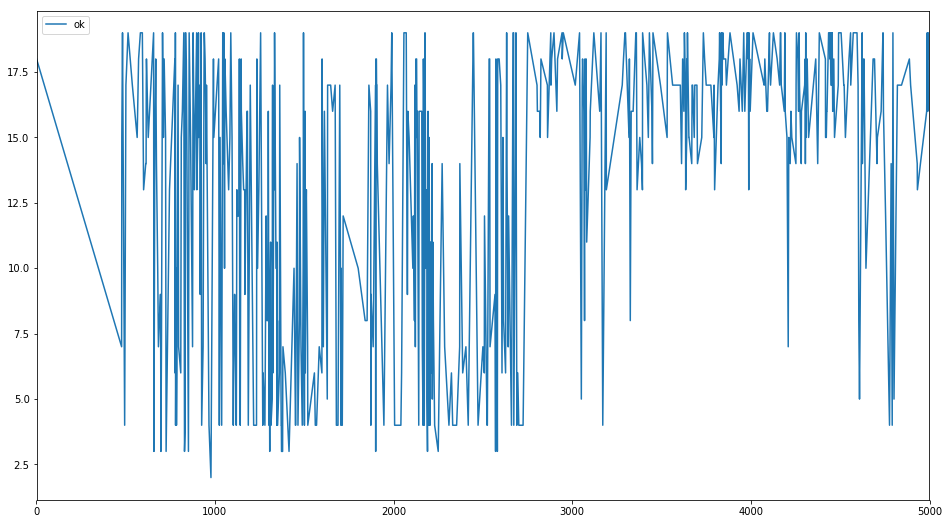

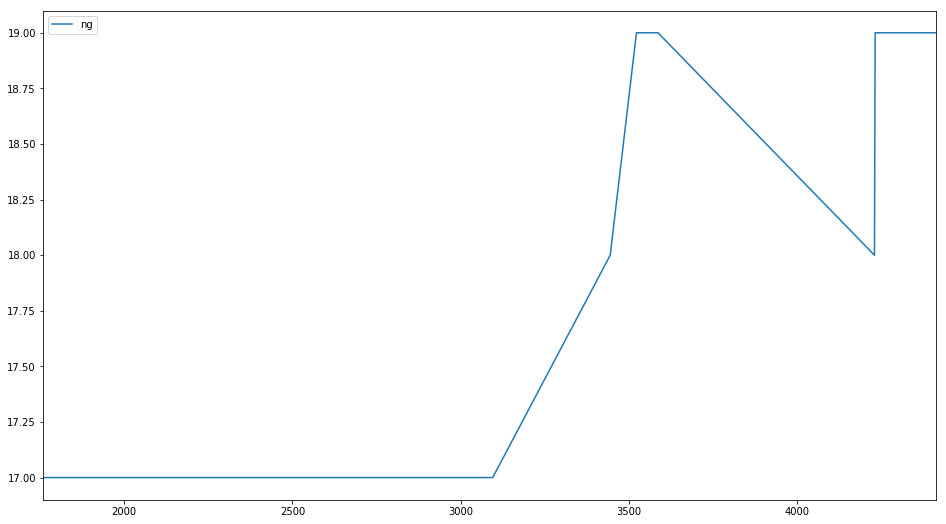

In [29]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
silicon_ok_pd[silicon_ok_pd['ok'] < 20].plot()
silicon_ng_pd[silicon_ng_pd['ng'] < 20].plot()
plt.show()

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


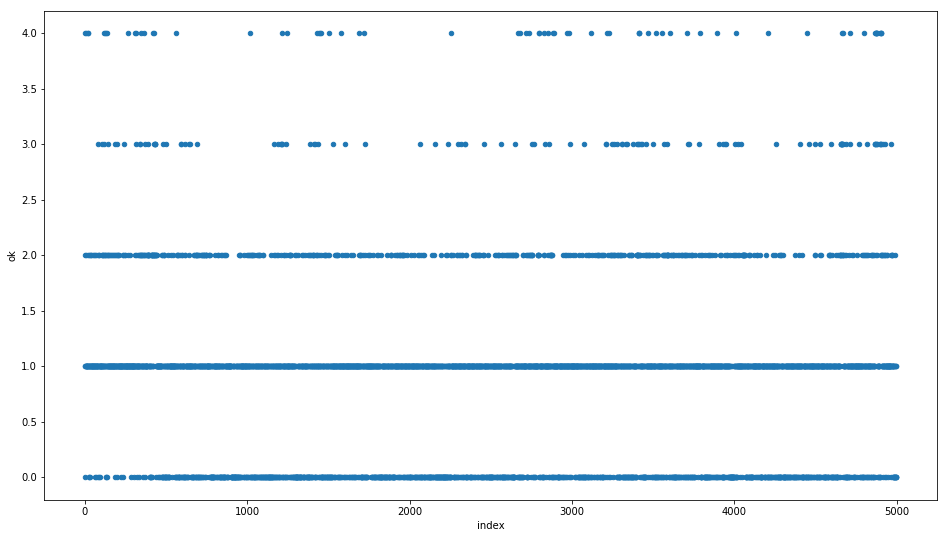

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


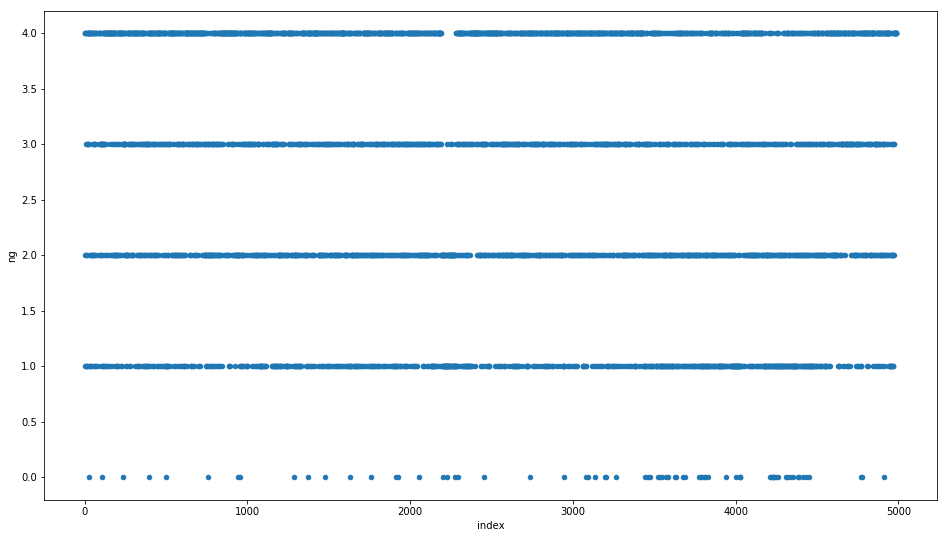

In [84]:
import pandas as pd

data = [{"low": 0, "high": 25, "name": 0},
        {"low": 25, "high": 50, "name": 1},
        {"low": 50, "high": 75, "name": 2},
        {"low": 75, "high": 100, "name": 3},
        {"low": 100, "high": 1000, "name": 4},]

myDF = pd.DataFrame(data)

#data to be binned
mySeries = silicon_ok_pd['ok']

#create bins from original data
bins = list(myDF["high"])
bins.insert(0,0)

pd.cut
# print(pd.cut(mySeries, bins, labels = myDF["name"]))
mySeries = pd.cut(mySeries, bins, labels = myDF["name"])
print(type(mySeries))
mySeries = mySeries.to_frame()
mySeries.reset_index(inplace=True)
print(type(mySeries))
# mySeries=mySeries.astype(float)
mySeries.ok=pd.to_numeric(mySeries.ok)
mySeries.plot.scatter(x='index', y= 'ok')
plt.show()


#data to be binned
mySeries = silicon_ng_pd['ng']

#create bins from original data
bins = list(myDF["high"])
bins.insert(0,0)

pd.cut
# print(pd.cut(mySeries, bins, labels = myDF["name"]))
mySeries = pd.cut(mySeries, bins, labels = myDF["name"])
print(type(mySeries))
mySeries = mySeries.to_frame()
mySeries.reset_index(inplace=True)
print(type(mySeries))
# mySeries=mySeries.astype(float)
mySeries.ng=pd.to_numeric(mySeries.ng)
mySeries.plot.scatter(x='index', y= 'ng')
plt.show()